#Step 1: Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

#Step 2: Reading and Understanding the Data

In [2]:
day = pd.read_csv('day.csv')
day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
day.shape

(730, 16)

In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Finding the numerical variables

In [6]:
day_desc = day.describe()
day_desc_cols = day_desc.columns
day_desc

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

#Step 3: Visualizing the data

In [7]:
day_desc_cols

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

<Figure size 1152x1152 with 0 Axes>

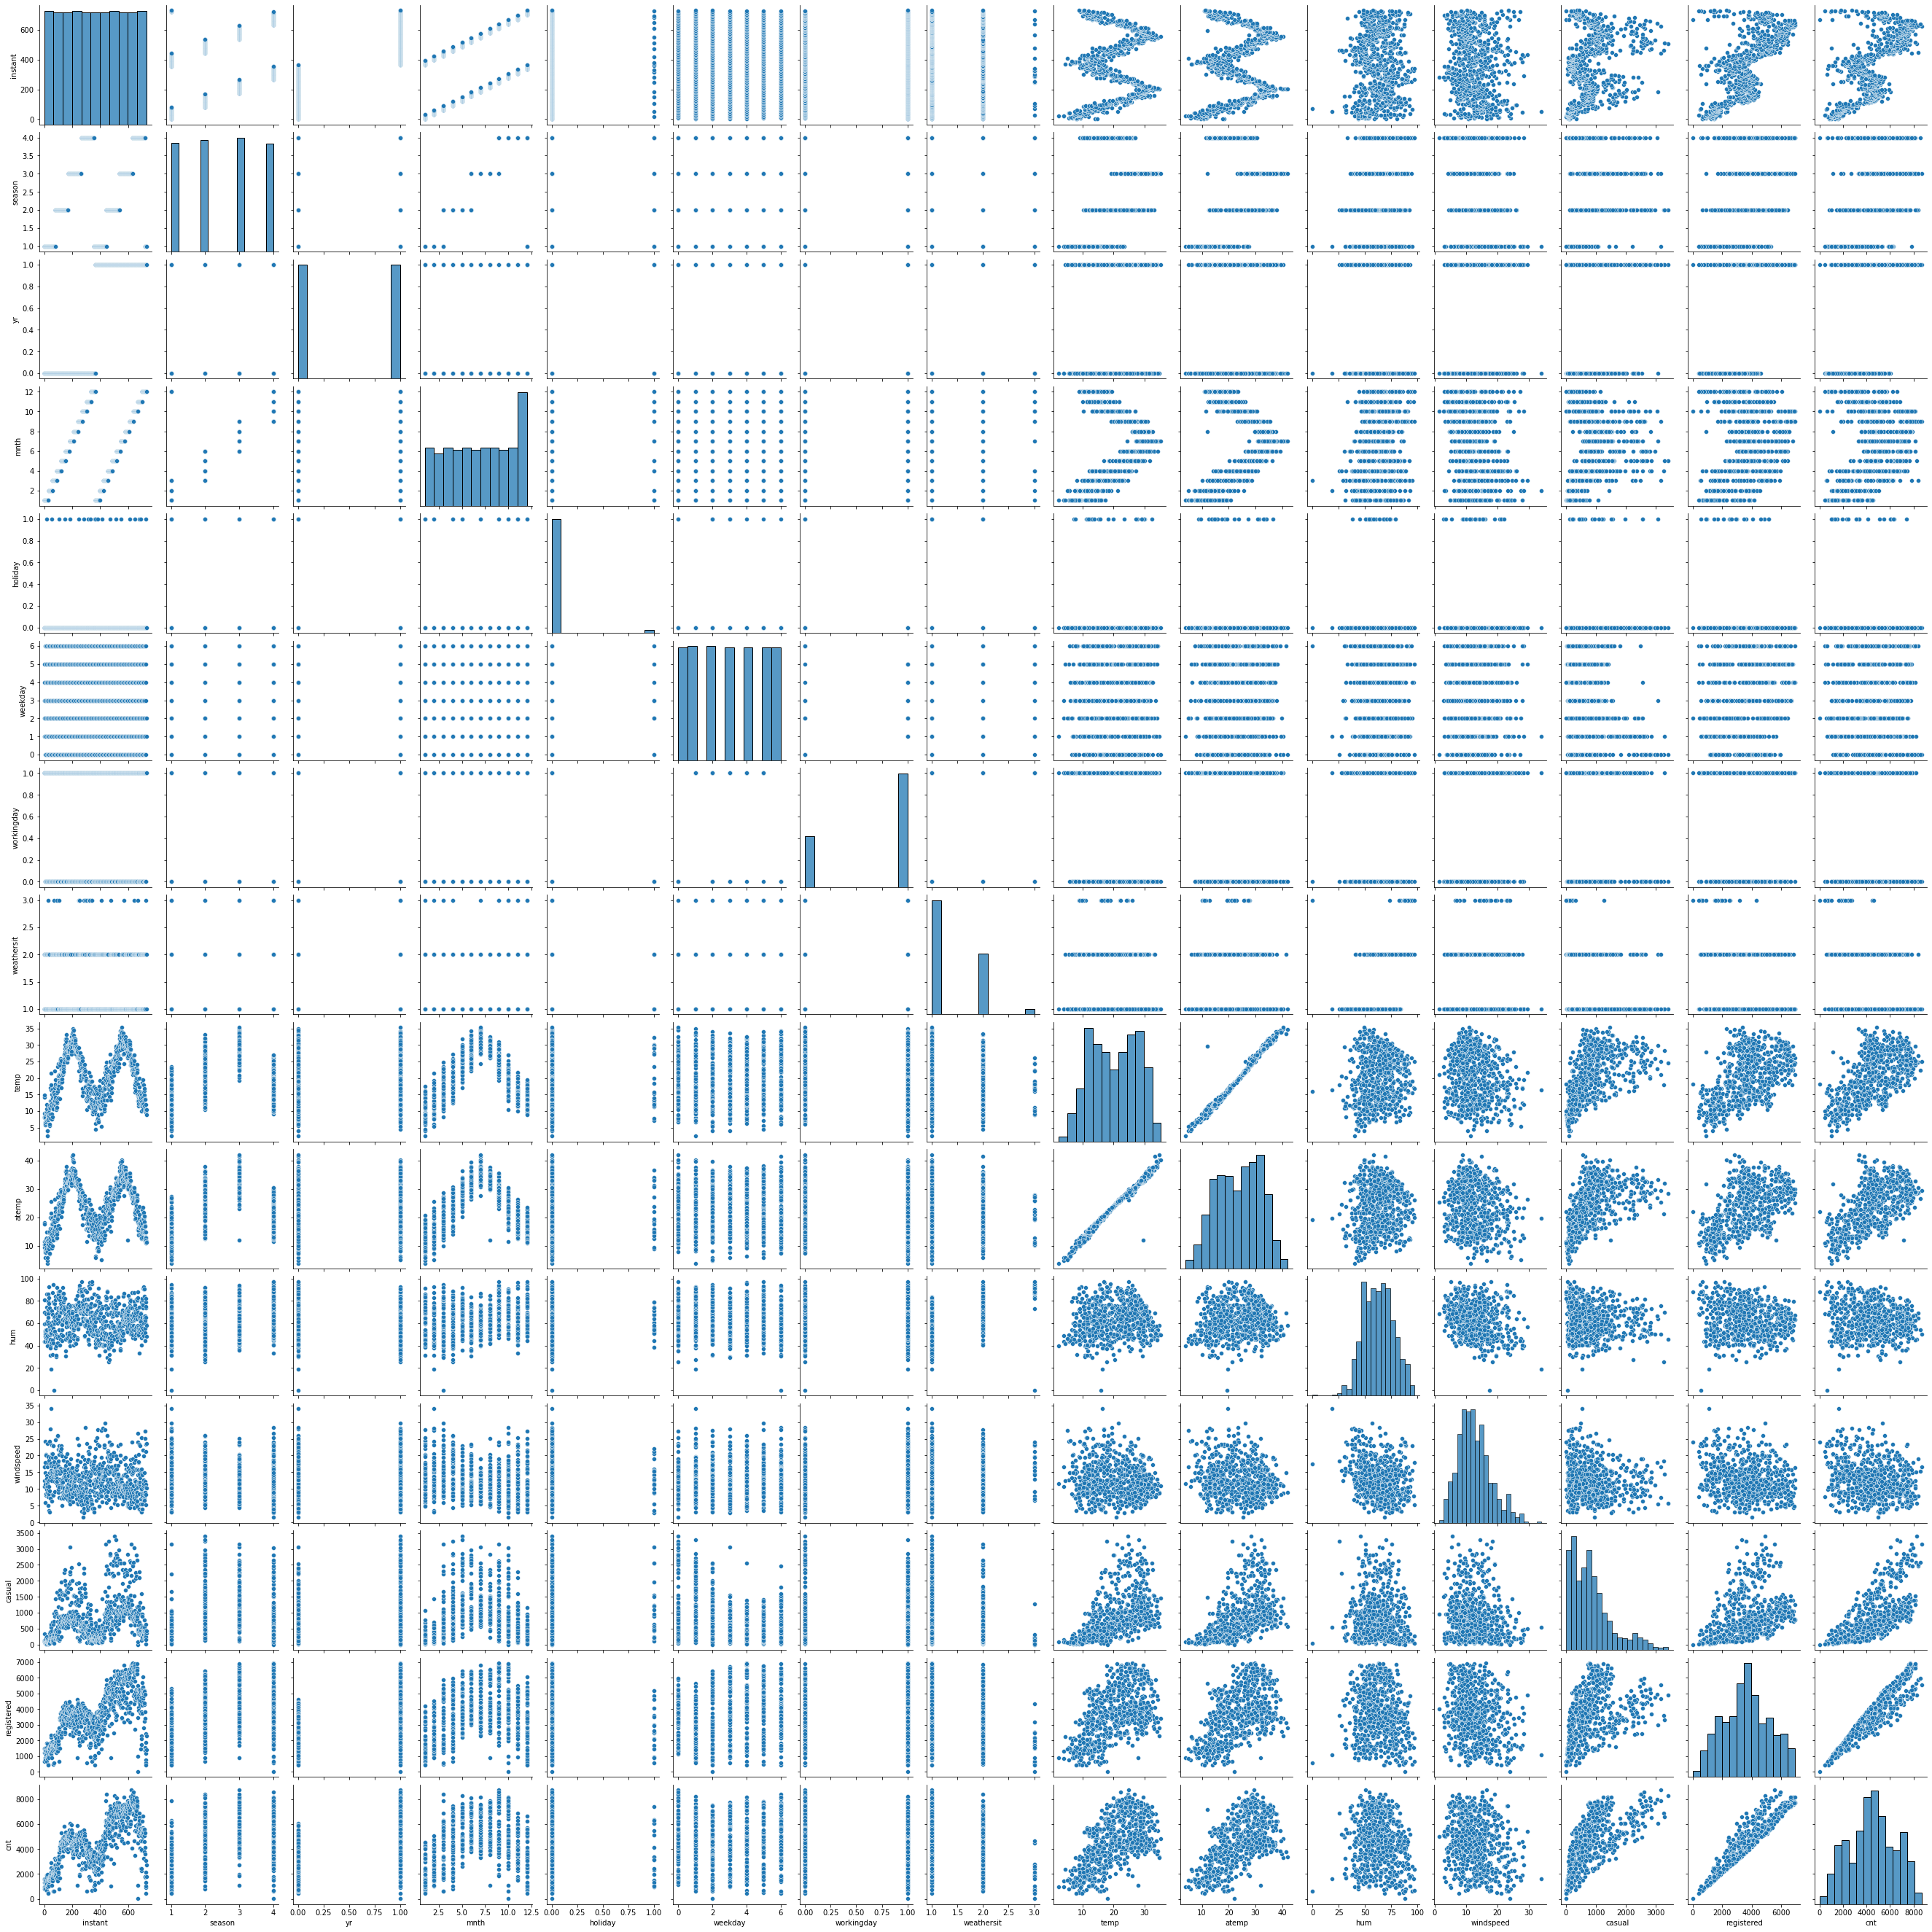

In [8]:
plt.figure(figsize = (16, 16))
sns.pairplot(day[day_desc_cols])
plt.show()

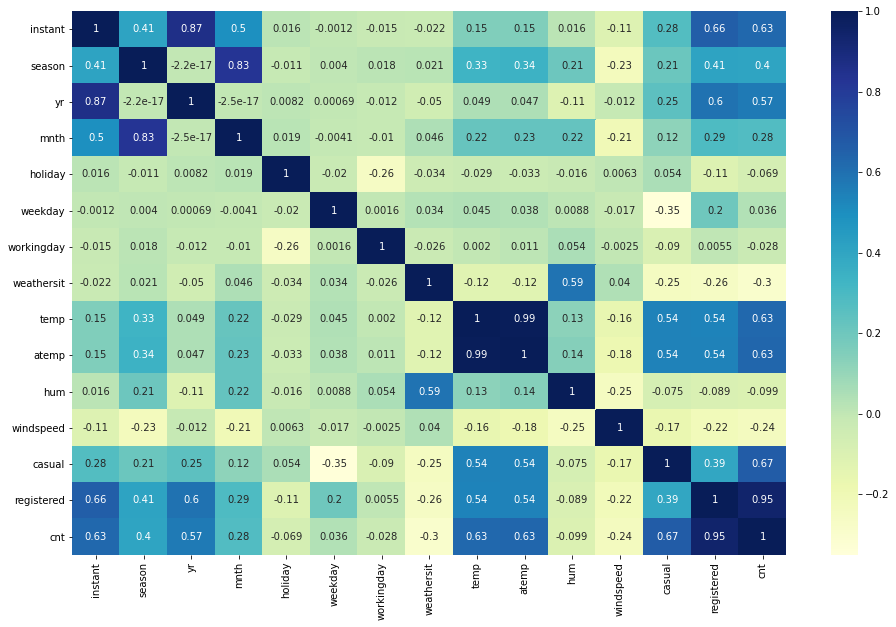

In [9]:
plt.figure(figsize = (16, 10))
sns.heatmap(day.corr(), annot = True, cmap="YlGnBu")
plt.show()

Trend set by number of bikes rented

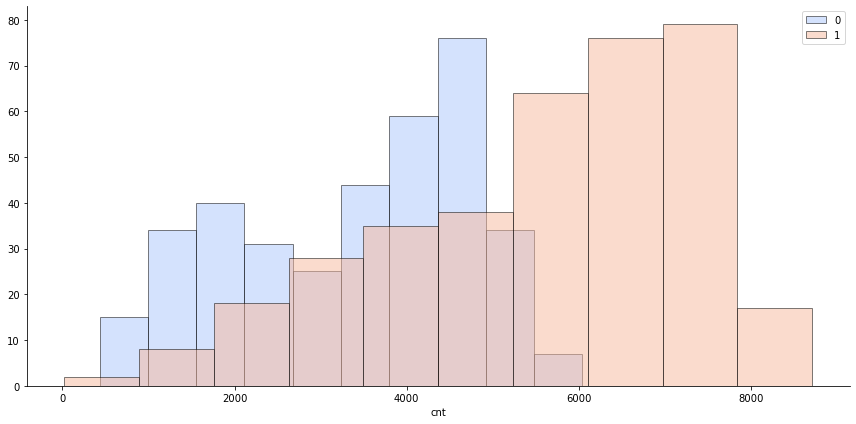

In [10]:
g=sns.FacetGrid(day, hue='yr', palette='coolwarm',height=6,aspect=2)
g=g.map(plt.hist,'cnt',alpha=0.5, edgecolor='black')
plt.legend()

Number of bikes rented per season in years 2018 and 2019.

Text(0.5, 1.0, 'Number of bikes rented per season')

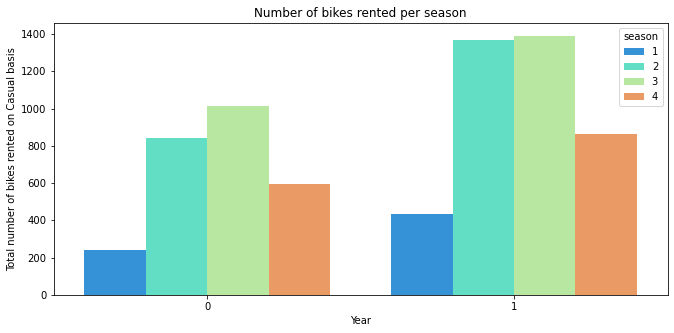

In [11]:
plt.figure(figsize=(11,5))
sns.barplot('yr','casual',hue='season', data=day, palette='rainbow', ci=None)
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented on Casual basis')
plt.title('Number of bikes rented per season')

We can clearly see that more bikes were rented in 2019 across all seasons



User trends across the seasons for working days and non-working days

In [12]:
df_season_winter=day[day['season']==4]
df_season_fall=day[day['season']==3]
df_season_summer=day[day['season']==2]
df_season_spring=day[day['season']==1]

In [13]:
df_season_winter.mnth.nunique()
df_season_fall.mnth.nunique()
df_season_summer.mnth.nunique()
df_season_spring.mnth.nunique()

4

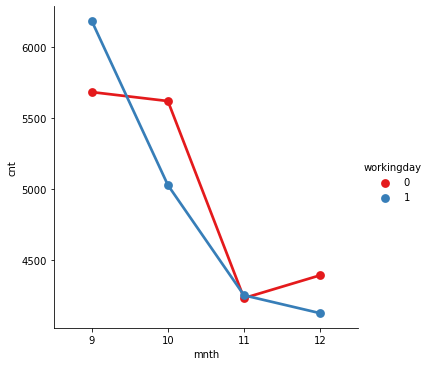

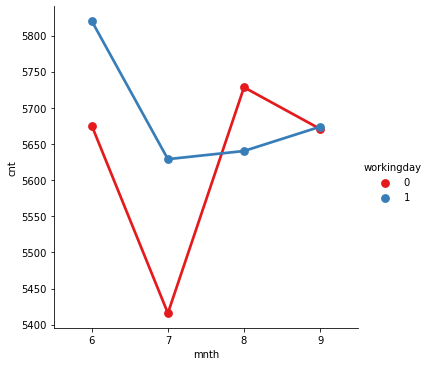

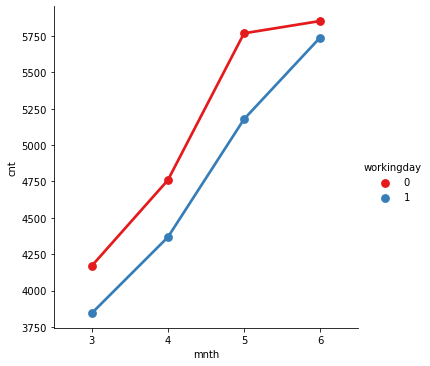

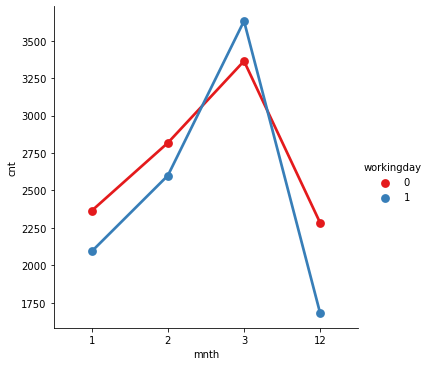

In [14]:
sns.factorplot('mnth','cnt',hue='workingday',data = df_season_winter, ci=None, palette='Set1')
sns.factorplot('mnth','cnt',hue='workingday',data = df_season_fall, ci=None, palette='Set1')
sns.factorplot('mnth','cnt',hue='workingday',data = df_season_summer, ci=None, palette='Set1')
sns.factorplot('mnth','cnt',hue='workingday',data = df_season_spring, ci=None, palette='Set1')

Bike rentals with respect to weather and climate

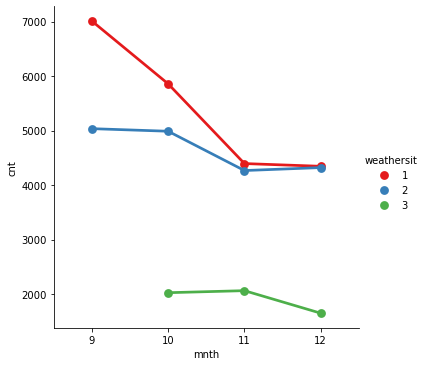

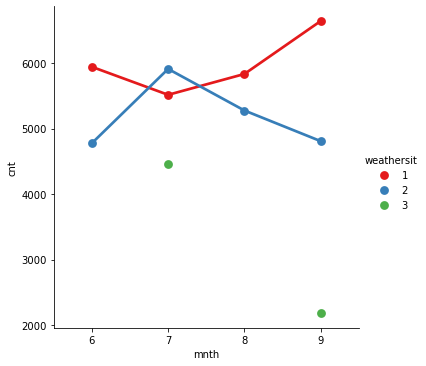

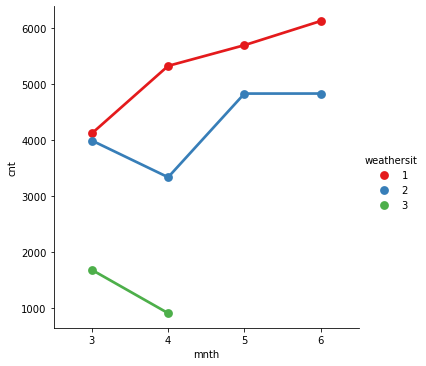

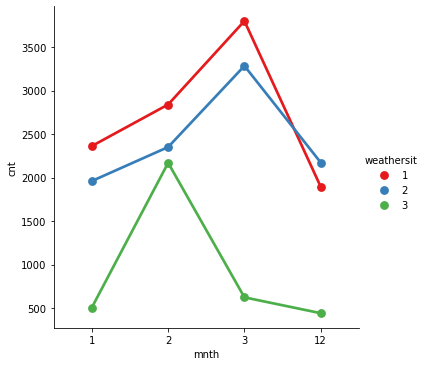

In [15]:
sns.factorplot('mnth','cnt',hue='weathersit',data = df_season_winter, ci=None, palette='Set1')
sns.factorplot('mnth','cnt',hue='weathersit',data = df_season_fall, ci=None, palette='Set1')
sns.factorplot('mnth','cnt',hue='weathersit',data = df_season_summer, ci=None, palette='Set1')
sns.factorplot('mnth','cnt',hue='weathersit',data = df_season_spring, ci=None, palette='Set1')

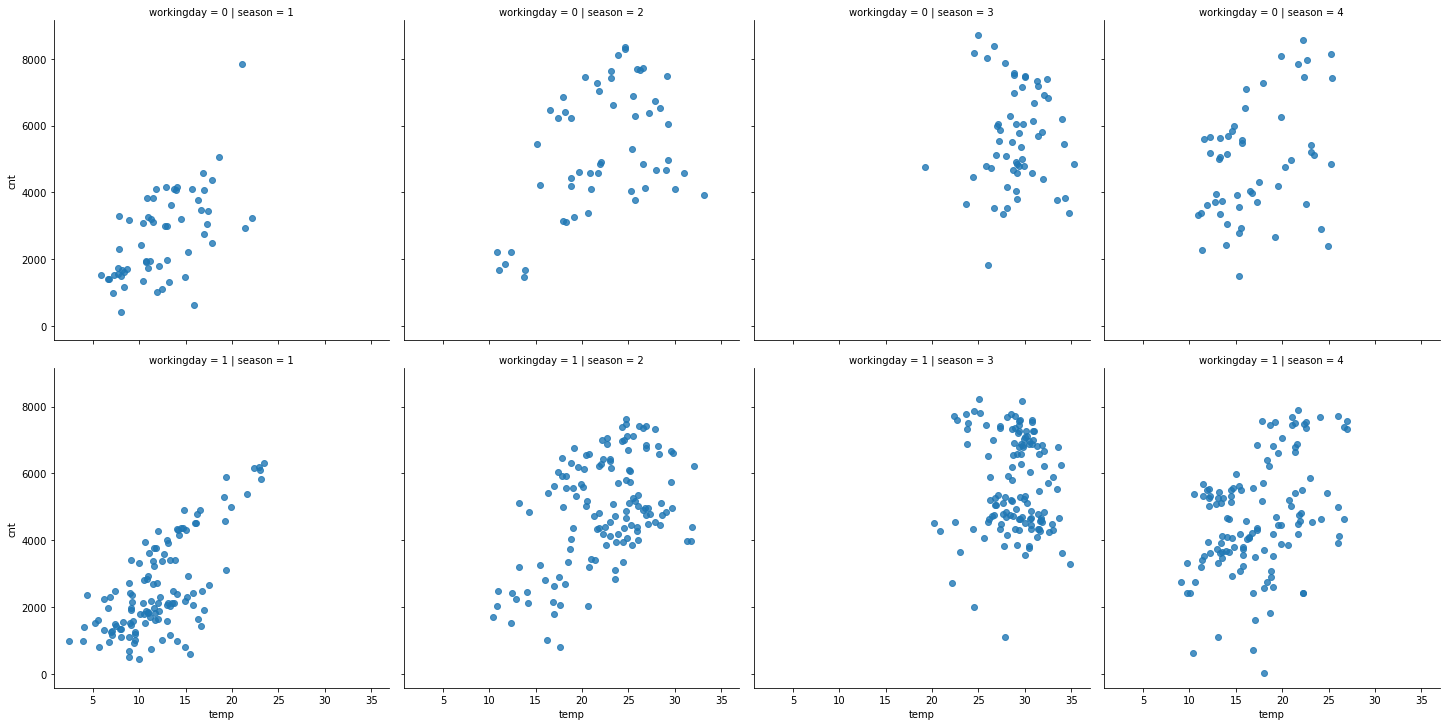

In [16]:
sns.lmplot('temp','cnt',row='workingday',col='season',data=day,palette='RdBu_r',fit_reg=False)

<AxesSubplot:>

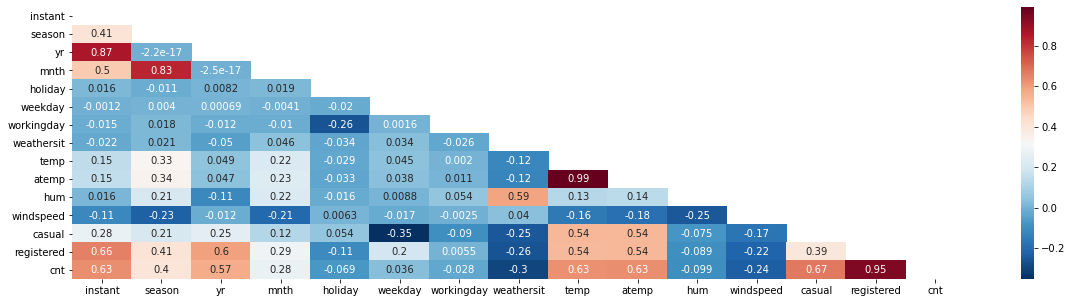

In [17]:
plt.figure(figsize=(20,5))
mask = np.zeros_like(day.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(day.corr(),cmap='RdBu_r',mask=mask, annot=True)


<AxesSubplot:xlabel='dteday'>

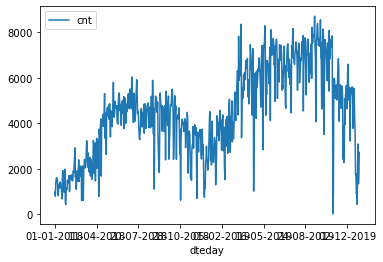

In [18]:
day.plot(x='dteday', y='cnt')

<Figure size 1152x1152 with 0 Axes>

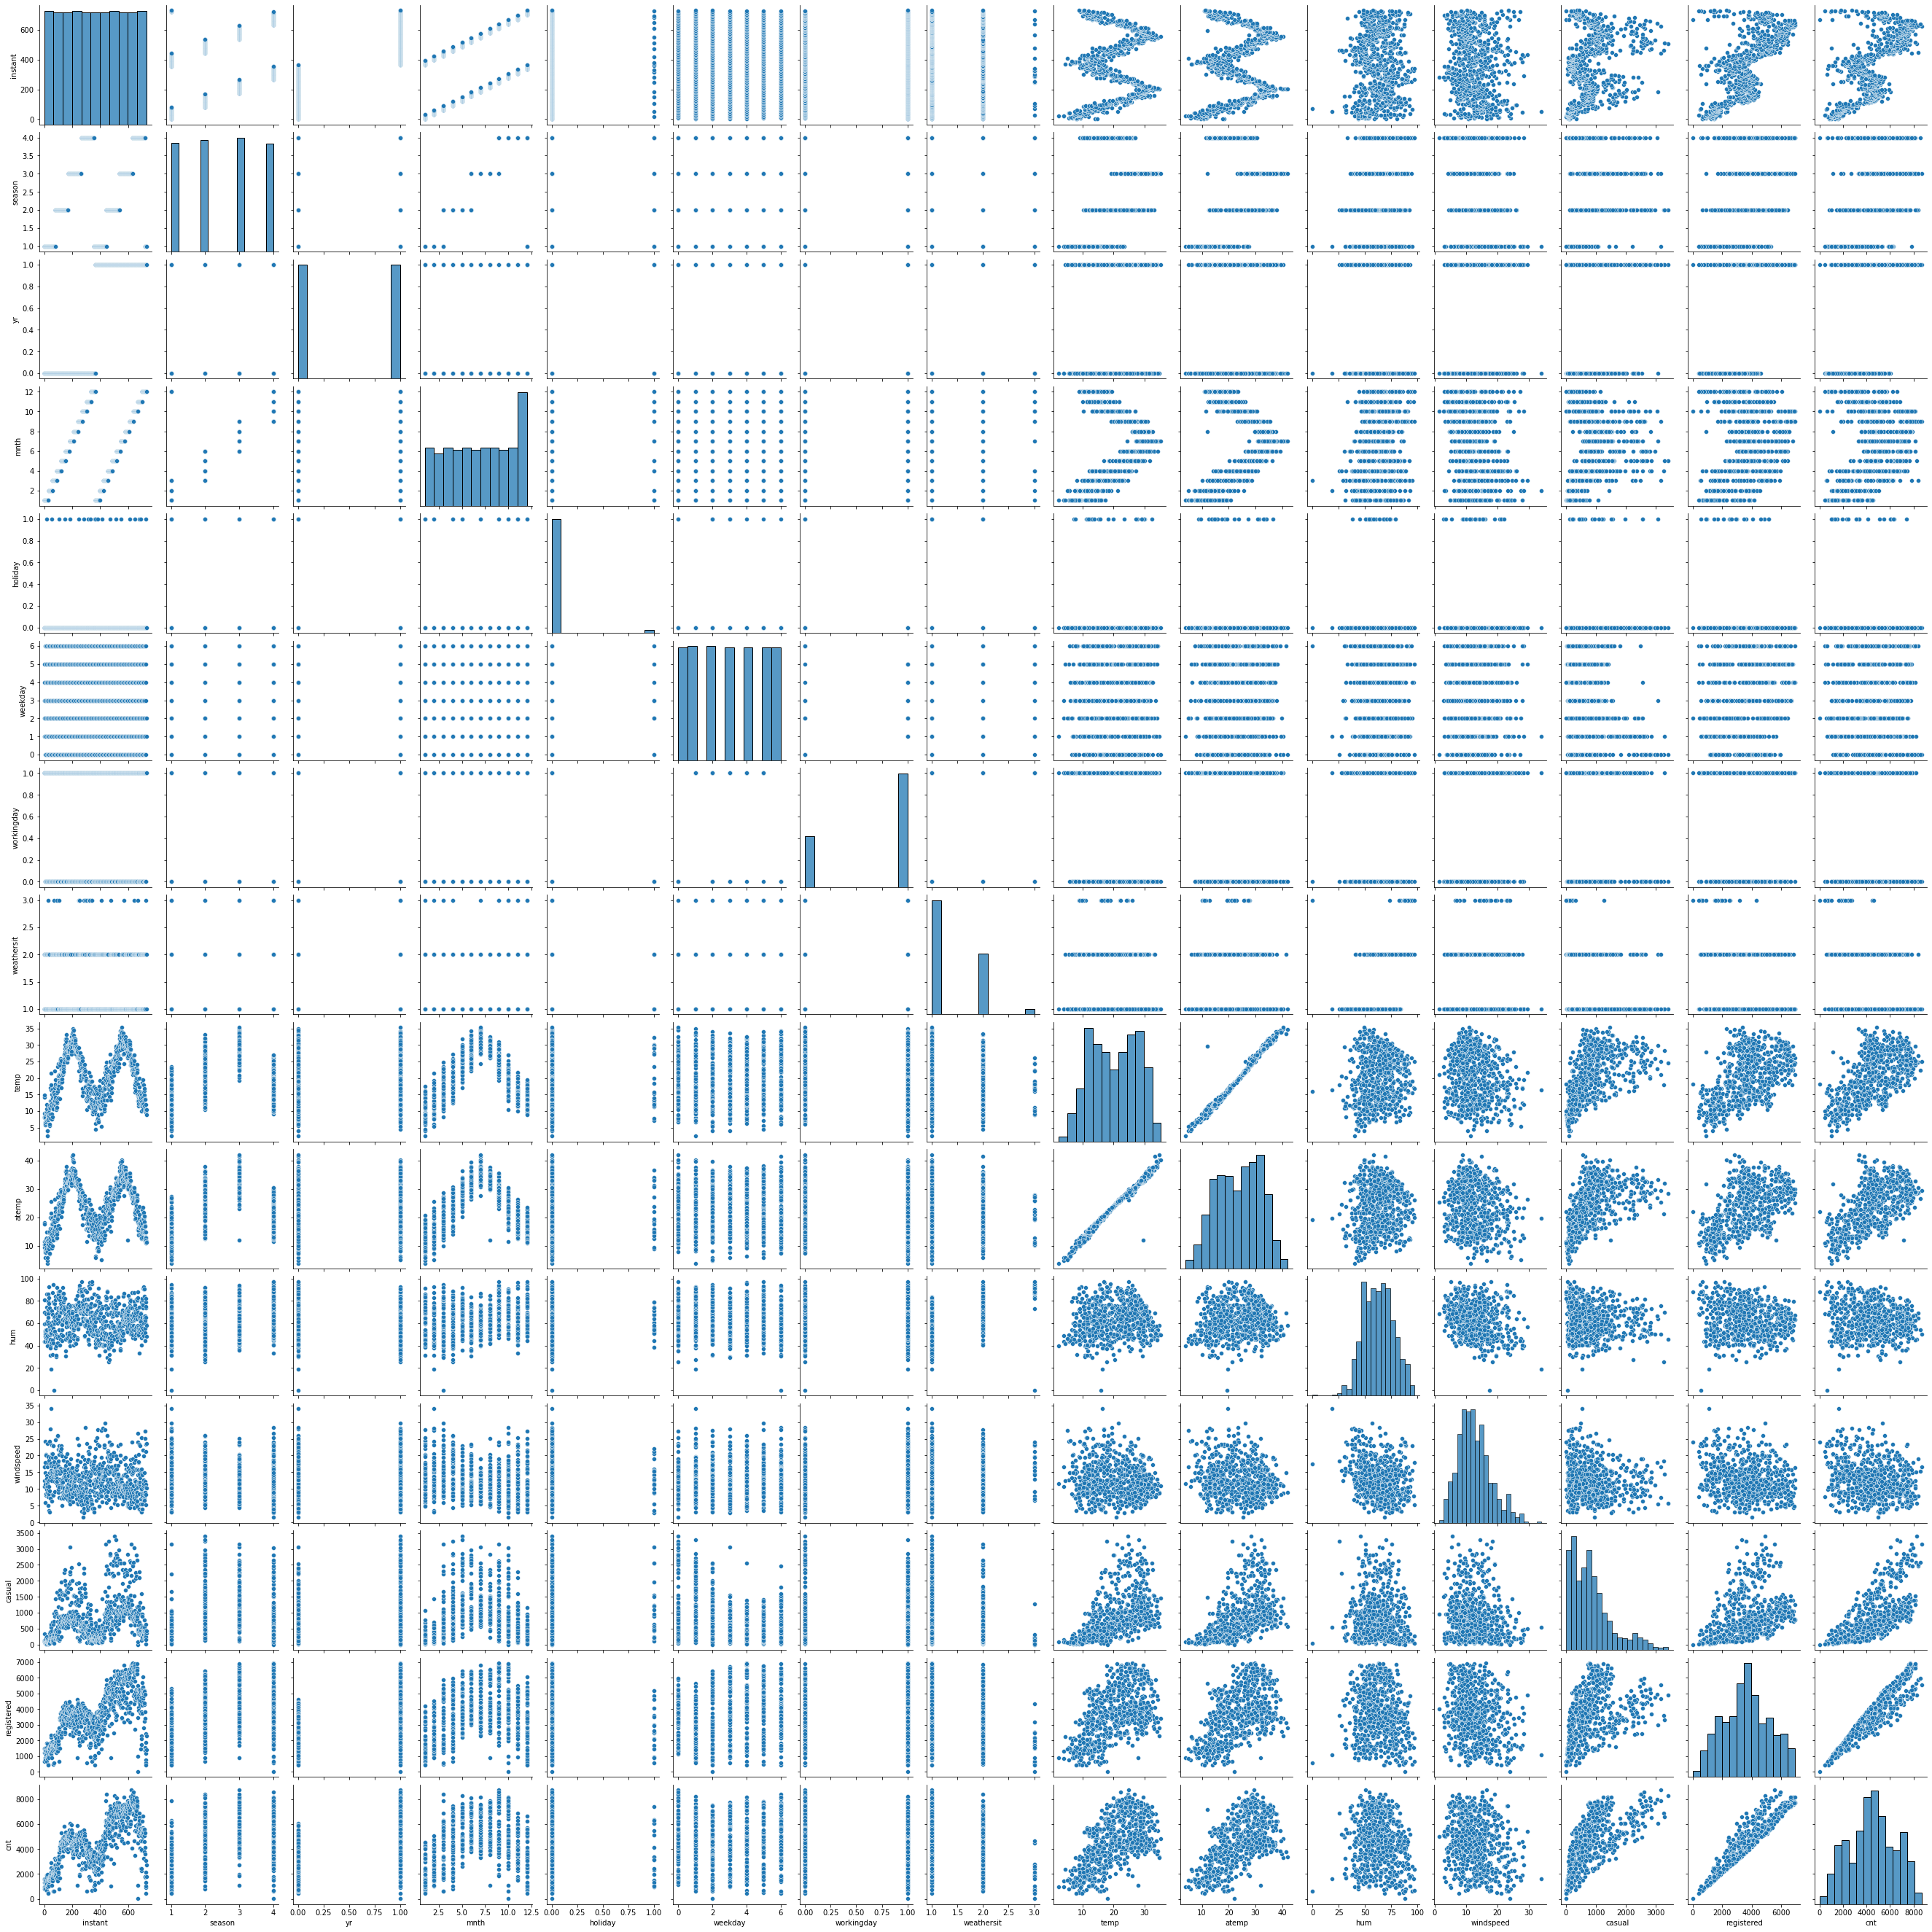

In [19]:
plt.figure(figsize = (16, 16))
sns.pairplot(day)
plt.show()


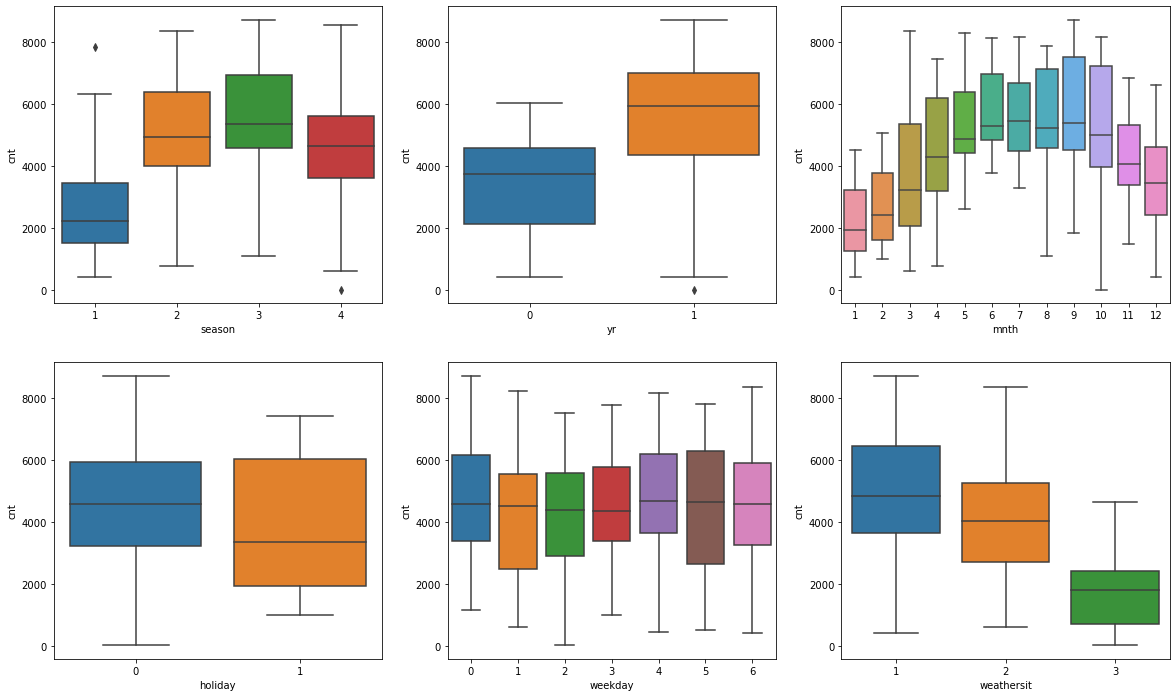

In [20]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.show()

Inferences:
Spring has very low bike rental numbers.
2019 has higher number of rentals than 2018.
Jan-Mar has low numbers of bike rentals.
Bike rentals during holidays are less than non-holidays.
There are no bike rentals during heavy rain/thunderstorm and the number significantly reduces during times of light rain/snow.

In [21]:
day.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

#Step 4: Data Preparation


1. Finding the number of null values

In [22]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We can concur that the dataset has no null values

The data looks seems to be pre-prepared as there are no null values.

2. Categorical Variables - Dummy/Binary encoding

i. Season

In [23]:
day['season'] = day['season'].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
season = pd.get_dummies(day['season'], drop_first = True)

In [24]:
day = pd.concat([day, season], axis = 1)

In [25]:
day.drop('season',axis=1,inplace=True)

In [26]:
day.head()

instant      dteday  yr  mnth  holiday  weekday  workingday  weathersit  \
0        1  01-01-2018   0     1        0        1           1           2   
1        2  02-01-2018   0     1        0        2           1           2   
2        3  03-01-2018   0     1        0        3           1           1   
3        4  04-01-2018   0     1        0        4           1           1   
4        5  05-01-2018   0     1        0        5           1           1   

        temp     atemp      hum  windspeed  casual  registered   cnt  spring  \
0  14.110847  18.18125  80.5833  10.749882     331         654   985       1   
1  14.902598  17.68695  69.6087  16.652113     131         670   801       1   
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349       1   
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562       1   
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600       1   

   summer  winter  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0

ii. Month

In [27]:
day['mnth'] = day['mnth'] = day['mnth'].map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})
month = pd.get_dummies(day['mnth'], drop_first = True)

In [28]:
day = pd.concat([day, month], axis = 1)

In [29]:
day.drop('mnth',axis=1,inplace=True)

In [30]:
day.head()

instant      dteday  yr  holiday  weekday  workingday  weathersit  \
0        1  01-01-2018   0        0        1           1           2   
1        2  02-01-2018   0        0        2           1           2   
2        3  03-01-2018   0        0        3           1           1   
3        4  04-01-2018   0        0        4           1           1   
4        5  05-01-2018   0        0        5           1           1   

        temp     atemp      hum  ...  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  \
0  14.110847  18.18125  80.5833  ...    0    0    1    0    0    0    0    0   
1  14.902598  17.68695  69.6087  ...    0    0    1    0    0    0    0    0   
2   8.050924   9.47025  43.7273  ...    0    0    1    0    0    0    0    0   
3   8.200000  10.60610  59.0435  ...    0    0    1    0    0    0    0    0   
4   9.305237  11.46350  43.6957  ...    0    0    1    0    0    0    0    0   

   Oct  Sep  
0    0    0  
1    0    0  
2    0    0  
3    0    0  
4    0    0  

[5 rows x 28 columns]

iii. Weekday

In [31]:
dmap = {1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',0:'Sun'}
day['weekday'].astype('object')
day['weekday'] = day['weekday'].map(dmap)

weekday = pd.get_dummies(day['weekday'], drop_first = True)

In [32]:
day = pd.concat([day, weekday], axis = 1)

In [33]:
day.drop('weekday',axis=1,inplace=True)

In [34]:
day.head()

instant      dteday  yr  holiday  workingday  weathersit       temp  \
0        1  01-01-2018   0        0           1           2  14.110847   
1        2  02-01-2018   0        0           1           2  14.902598   
2        3  03-01-2018   0        0           1           1   8.050924   
3        4  04-01-2018   0        0           1           1   8.200000   
4        5  05-01-2018   0        0           1           1   9.305237   

      atemp      hum  windspeed  ...  May  Nov  Oct  Sep  Mon  Sat  Sun  Thu  \
0  18.18125  80.5833  10.749882  ...    0    0    0    0    1    0    0    0   
1  17.68695  69.6087  16.652113  ...    0    0    0    0    0    0    0    0   
2   9.47025  43.7273  16.636703  ...    0    0    0    0    0    0    0    0   
3  10.60610  59.0435  10.739832  ...    0    0    0    0    0    0    0    1   
4  11.46350  43.6957  12.522300  ...    0    0    0    0    0    0    0    0   

   Tue  Wed  
0    0    0  
1    1    0  
2    0    1  
3    0    0  
4    0    0  

[5 rows x 33 columns]

iv. Weather

In [35]:
day['weathersit'] = day['weathersit'].map({1:"Clear", 2:"Cloudy", 3:"Snow/Rain", 4:"Heavy Rain"})
weathersit = pd.get_dummies(day['weathersit'], drop_first = True)

In [36]:
day = pd.concat([day, weathersit], axis = 1)

In [37]:
day.drop('weathersit',axis=1,inplace=True)

In [38]:
day.head()

instant      dteday  yr  holiday  workingday       temp     atemp      hum  \
0        1  01-01-2018   0        0           1  14.110847  18.18125  80.5833   
1        2  02-01-2018   0        0           1  14.902598  17.68695  69.6087   
2        3  03-01-2018   0        0           1   8.050924   9.47025  43.7273   
3        4  04-01-2018   0        0           1   8.200000  10.60610  59.0435   
4        5  05-01-2018   0        0           1   9.305237  11.46350  43.6957   

   windspeed  casual  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  Cloudy  \
0  10.749882     331  ...    0    0    1    0    0    0    0    0       1   
1  16.652113     131  ...    0    0    0    0    0    0    1    0       1   
2  16.636703     120  ...    0    0    0    0    0    0    0    1       0   
3  10.739832     108  ...    0    0    0    0    0    1    0    0       0   
4  12.522300      82  ...    0    0    0    0    0    0    0    0       0   

   Snow/Rain  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 34 columns]

3. Rescaling the features

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [41]:
day[num_vars] = scaler.fit_transform(day[num_vars])
day.head()

instant      dteday  yr  holiday  workingday      temp     atemp       hum  \
0        1  01-01-2018   0        0           1  0.355170  0.373517  0.828620   
1        2  02-01-2018   0        0           1  0.379232  0.360541  0.715771   
2        3  03-01-2018   0        0           1  0.171000  0.144830  0.449638   
3        4  04-01-2018   0        0           1  0.175530  0.174649  0.607131   
4        5  05-01-2018   0        0           1  0.209120  0.197158  0.449313   

   windspeed    casual  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  Cloudy  \
0   0.284606  0.096538  ...    0    0    1    0    0    0    0    0       1   
1   0.466215  0.037852  ...    0    0    0    0    0    0    1    0       1   
2   0.465740  0.034624  ...    0    0    0    0    0    0    0    1       0   
3   0.284297  0.031103  ...    0    0    0    0    0    1    0    0       0   
4   0.339143  0.023474  ...    0    0    0    0    0    0    0    0       0   

   Snow/Rain  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 34 columns]

4. Dropping unrequired columns

The datasource contains columns which are not important to our linear model such as instant

In [42]:
day.drop('instant',axis=1,inplace=True)
day.drop('dteday',axis=1,inplace=True)
day.drop('casual',axis=1,inplace=True)
day.drop('registered',axis=1,inplace=True)

5. Splitting data into test and train

In [43]:
# importing libraries for splitting

import sklearn
from sklearn.model_selection import train_test_split

In [44]:
df_train,df_test = train_test_split(day, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


6. Creating the Correlation Matrix (Pearson's)

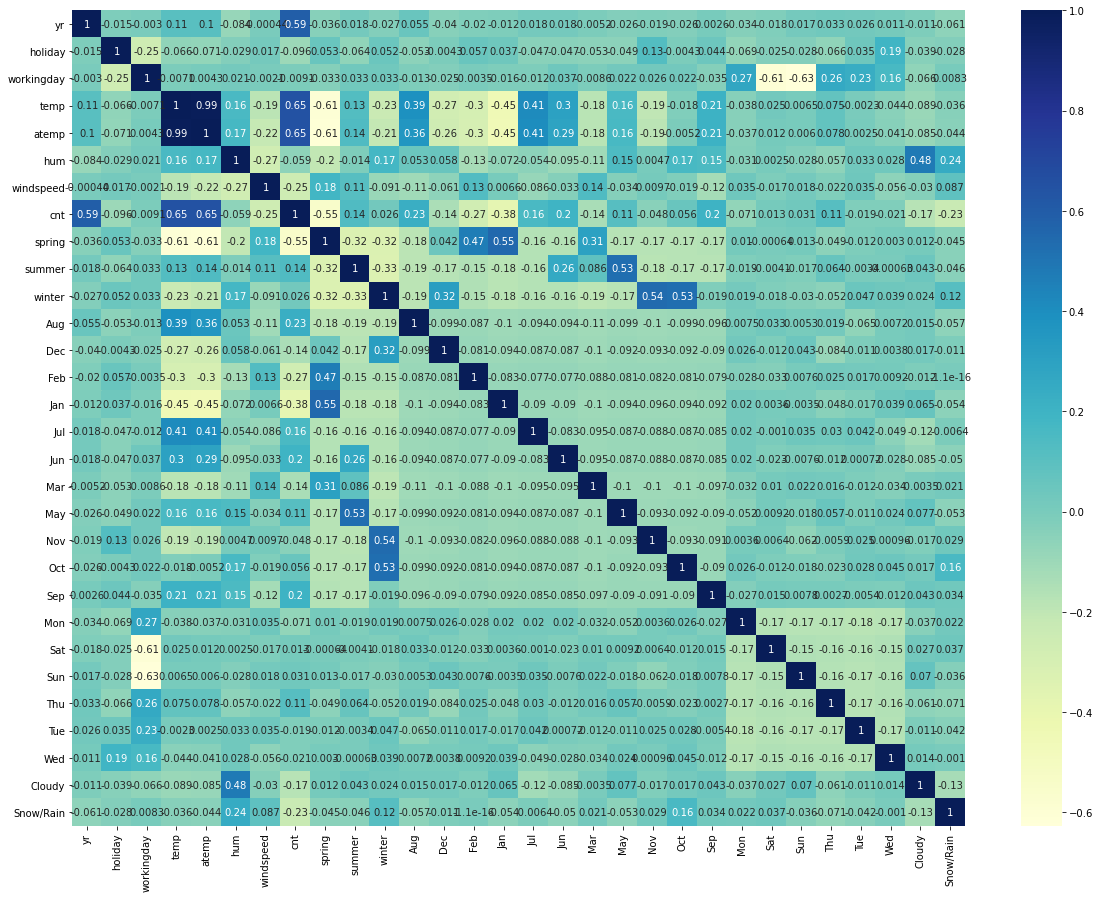

In [45]:
plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


#Step 5: Splitting the Data into Training and Testing Sets

Since we need to forecast and predict variables to increase the total number of bike rentals, we can select 'cnt' as our target

In [46]:
y_train = df_train.pop('cnt')
X_train = df_train

#Step 6: Building a linear model

1. Adding variables to the model

Model 1: Adding variable 'temp' to the model

In [47]:
X_train_sm = sm.add_constant(X_train['temp'])

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [48]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           2.46e-61
Time:                        17:58:15   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the R-Squared value of 0.416 is fairly high which tells us that we are moving in the right direction.

Model 2: Adding variable 'atemp' to the model

In [49]:
#adding another variable
X_train_sm = X_train[['temp', 'atemp']]

X_train_sm = sm.add_constant(X_train_sm)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           8.38e-61
Time:                        17:59:16   Log-Likelihood:                 178.05
No. Observations:                 510   AIC:                            -350.1
Df Residuals:                     507   BIC:                            -337.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1627      0.020      8.198      0.000       0.124       0.202
temp           0.1853      0.233      0.796      0.426      -0.272       0.643
atemp          0.4896      0.248      1.977      0.049       0.003       0.976
==============================================================================
Omnibus:                        4.986   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.696
Skew:                           0.070   Prob(JB):                        0.158
Kurtosis:                       2.607   Cond. No.                         56.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the R-Squared value of 0.421 is fairly high.

But, the p-value for variable - 'temp' is quite high, thereby giving us the undesrtanding that it has a low significance

Model 3: Using only variable 'atemp' in the model

In [50]:
#adding another variable
X_train_sm = X_train[['atemp']]

X_train_sm = sm.add_constant(X_train_sm)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     367.6
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           4.77e-62
Time:                        18:00:38   Log-Likelihood:                 177.73
No. Observations:                 510   AIC:                            -351.5
Df Residuals:                     508   BIC:                            -343.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1622      0.020      8.181      0.000       0.123       0.201
atemp          0.6846      0.036     19.173      0.000       0.614       0.755
==============================================================================
Omnibus:                        3.256   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.759
Skew:                           0.081   Prob(JB):                        0.252
Kurtosis:                       2.678   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the R-Squared value of 0.420 is fairly high.

And judging from the p-values, we can say that the variables are significant. Further, we concur that 'atemp' explains how the temperature feels to the user. This give us the understanding that bike rentals go up depending on how the temperature feels rather than the temperature itself

Model 4: Adding variable 'yr' to the model

Since the variable 'yr' consists of only two values- 0 and 1, to signify the years 2018 and 2019, we can logically assign meaning for the variable - 'yr' to signify the years that the brand - 'Zoombikes' has existed.

In [51]:
#adding another variable
X_train_sm = X_train[['atemp', 'yr']]

X_train_sm = sm.add_constant(X_train_sm)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     582.7
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          3.98e-132
Time:                        18:02:41   Log-Likelihood:                 343.25
No. Observations:                 510   AIC:                            -680.5
Df Residuals:                     507   BIC:                            -667.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0718      0.015      4.802      0.000       0.042       0.101
atemp          0.6259      0.026     24.092      0.000       0.575       0.677
yr             0.2373      0.011     21.524      0.000       0.216       0.259
==============================================================================
Omnibus:                       38.998   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.230
Skew:                          -0.546   Prob(JB):                     8.34e-14
Kurtosis:                       4.281   Cond. No.                         6.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the R-Squared value of 0.697 is high.

This further goes to show that there is a year on year growth

Model 6: Adding variable 'holiday' to the model

In [52]:
#adding another variable
X_train_sm = X_train[['atemp', 'yr', 'holiday']]

X_train_sm = sm.add_constant(X_train_sm)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     391.7
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.82e-131
Time:                        18:03:57   Log-Likelihood:                 345.05
No. Observations:                 510   AIC:                            -682.1
Df Residuals:                     506   BIC:                            -665.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0753      0.015      5.012      0.000       0.046       0.105
atemp          0.6225      0.026     23.963      0.000       0.571       0.673
yr             0.2372      0.011     21.564      0.000       0.216       0.259
holiday       -0.0659      0.035     -1.895      0.059      -0.134       0.002
==============================================================================
Omnibus:                       40.682   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.855
Skew:                          -0.554   Prob(JB):                     8.26e-15
Kurtosis:                       4.351   Cond. No.                         8.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the R-Squared value of 0.699 is high; but hass not significantly changed from the previous model. However, it has low p-values, hence, we can say that it had significance to the model.

Model 7: Adding variable 'windspeed' to the model

In [53]:
#adding another variable
X_train_sm = X_train[['atemp', 'yr', 'holiday', 'windspeed']]

X_train_sm = sm.add_constant(X_train_sm)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     317.4
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          2.72e-136
Time:                        18:04:51   Log-Likelihood:                 359.39
No. Observations:                 510   AIC:                            -708.8
Df Residuals:                     505   BIC:                            -687.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1533      0.021      7.462      0.000       0.113       0.194
atemp          0.5923      0.026     22.878      0.000       0.541       0.643
yr             0.2385      0.011     22.275      0.000       0.217       0.260
holiday       -0.0655      0.034     -1.934      0.054      -0.132       0.001
windspeed     -0.1811      0.034     -5.405      0.000      -0.247      -0.115
==============================================================================
Omnibus:                       31.218   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.831
Skew:                          -0.480   Prob(JB):                     1.84e-10
Kurtosis:                       4.090   Cond. No.                         9.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the R-Squared value of 0.715 and p-value of 0.0 denotes that 'windspeed' has a great contribution to the model as well as high significance

Model 8: Adding variable 'Snow/Rain' to the model

In [54]:
#adding another variable
X_train_sm = X_train[['atemp', 'yr', 'holiday', 'windspeed', 'Snow/Rain']]

X_train_sm = sm.add_constant(X_train_sm)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     288.6
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          2.33e-145
Time:                        18:05:57   Log-Likelihood:                 383.55
No. Observations:                 510   AIC:                            -755.1
Df Residuals:                     504   BIC:                            -729.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1575      0.020      8.029      0.000       0.119       0.196
atemp          0.5884      0.025     23.801      0.000       0.540       0.637
yr             0.2342      0.010     22.876      0.000       0.214       0.254
holiday       -0.0728      0.032     -2.252      0.025      -0.136      -0.009
windspeed     -0.1628      0.032     -5.072      0.000      -0.226      -0.100
Snow/Rain     -0.2142      0.030     -7.077      0.000      -0.274      -0.155
==============================================================================
Omnibus:                       14.725   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.040
Skew:                          -0.329   Prob(JB):                     0.000199
Kurtosis:                       3.607   Cond. No.                         9.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

While 'Snow/Rain' has a negative coeff, we can see that the R-Squared value of 0.741 and p-value of 0.0 denotes that 'Snow/Rain' has a great contribution to the model as well as high significance

Model 9: Adding variable 'summer' to the model

In [55]:
#adding another variable
X_train_sm = X_train[['atemp', 'yr', 'holiday', 'windspeed', 'Snow/Rain', 'summer']]

X_train_sm = sm.add_constant(X_train_sm)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     244.4
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.50e-145
Time:                        18:06:50   Log-Likelihood:                 386.93
No. Observations:                 510   AIC:                            -759.9
Df Residuals:                     503   BIC:                            -730.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1592      0.020      8.155      0.000       0.121       0.198
atemp          0.5781      0.025     23.216      0.000       0.529       0.627
yr             0.2343      0.010     23.013      0.000       0.214       0.254
holiday       -0.0680      0.032     -2.112      0.035      -0.131      -0.005
windspeed     -0.1752      0.032     -5.429      0.000      -0.239      -0.112
Snow/Rain     -0.2099      0.030     -6.966      0.000      -0.269      -0.151
summer         0.0310      0.012      2.589      0.010       0.007       0.055
==============================================================================
Omnibus:                       14.255   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.560
Skew:                          -0.297   Prob(JB):                     0.000154
Kurtosis:                       3.688   Cond. No.                         9.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

While 'summer' has a positive coeff, we can see that the R-Squared value of 0.745 and p-value of 0.01 denotes that 'summer' contributes to the model with high significance

Model 10: Adding variable 'spring' to the model

In [56]:
#adding another variable
X_train_sm = X_train[['atemp', 'yr', 'holiday', 'windspeed', 'Snow/Rain', 'summer', 'spring']]

X_train_sm = sm.add_constant(X_train_sm)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     269.4
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.74e-165
Time:                        18:07:54   Log-Likelihood:                 436.55
No. Observations:                 510   AIC:                            -857.1
Df Residuals:                     502   BIC:                            -823.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2787      0.021     13.185      0.000       0.237       0.320
atemp          0.4085      0.028     14.639      0.000       0.354       0.463
yr             0.2371      0.009     25.633      0.000       0.219       0.255
holiday       -0.0709      0.029     -2.424      0.016      -0.128      -0.013
windspeed     -0.1371      0.030     -4.641      0.000      -0.195      -0.079
Snow/Rain     -0.2437      0.028     -8.840      0.000      -0.298      -0.190
summer        -0.0082      0.012     -0.711      0.478      -0.031       0.014
spring        -0.1496      0.014    -10.384      0.000      -0.178      -0.121
==============================================================================
Omnibus:                       56.013   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.680
Skew:                          -0.662   Prob(JB):                     1.86e-23
Kurtosis:                       4.781   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

While 'spring' has a negative coeff, we can see that the R-Squared value of 0.79 and p-value of 0.0 denotes that 'spring' contributes to the model with high significance

Model 11: Adding variable 'Cloudy' to the model

In [57]:
#adding another variable
X_train_sm = X_train[['atemp', 'yr', 'holiday', 'windspeed', 'Snow/Rain', 'summer', 'spring', 'winter', 'Cloudy']]

X_train_sm = sm.add_constant(X_train_sm)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     250.8
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          4.69e-179
Time:                        18:08:52   Log-Likelihood:                 474.26
No. Observations:                 510   AIC:                            -928.5
Df Residuals:                     500   BIC:                            -886.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2488      0.030      8.317      0.000       0.190       0.308
atemp          0.4626      0.035     13.179      0.000       0.394       0.532
yr             0.2354      0.009     27.319      0.000       0.218       0.252
holiday       -0.0842      0.027     -3.090      0.002      -0.138      -0.031
windspeed     -0.1435      0.028     -5.212      0.000      -0.198      -0.089
Snow/Rain     -0.2748      0.026    -10.615      0.000      -0.326      -0.224
summer         0.0238      0.014      1.736      0.083      -0.003       0.051
spring        -0.1039      0.020     -5.142      0.000      -0.144      -0.064
winter         0.0545      0.016      3.356      0.001       0.023       0.086
Cloudy        -0.0756      0.009     -8.274      0.000      -0.094      -0.058
==============================================================================
Omnibus:                       64.675   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.146
Skew:                          -0.644   Prob(JB):                     1.38e-36
Kurtosis:                       5.472   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

While 'Cloudy' has a negative coeff, we can see that the R-Squared value of 0.819 and p-value of 0.0 denotes that 'Cloudy' contributes to the model with high significance

2. Adding all variables

In [58]:
cols = X_train.columns
#X_train[cols]

In [59]:
X_train_sm1 = (X_train[cols])

X_train_sm1 = sm.add_constant(X_train_sm1)

lr1 = sm.OLS(y_train, X_train_sm1)

lr_model1 = lr1.fit()

lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     93.97
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.24e-177
Time:                        18:10:16   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -986.1
Df Residuals:                     480   BIC:                            -859.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3992      0.085      4.675      0.000       0.231       0.567
yr             0.2312      0.008     28.360      0.000       0.215       0.247
holiday       -0.1345      0.066     -2.054      0.041      -0.263      -0.006
workingday    -0.0605      0.071     -0.849      0.396      -0.200       0.079
temp           0.3873      0.143      2.699      0.007       0.105       0.669
atemp          0.0547      0.139      0.392      0.695      -0.219       0.329
hum           -0.1582      0.039     -4.050      0.000      -0.235      -0.081
windspeed     -0.1880      0.028     -6.751      0.000      -0.243      -0.133
spring        -0.0409      0.030     -1.349      0.178      -0.100       0.019
summer         0.0458      0.026      1.733      0.084      -0.006       0.098
winter         0.1121      0.028      3.969      0.000       0.057       0.168
Aug            0.0291      0.034      0.849      0.396      -0.038       0.096
Dec           -0.0444      0.034     -1.308      0.191      -0.111       0.022
Feb           -0.0373      0.033     -1.119      0.264      -0.103       0.028
Jan           -0.0640      0.034     -1.887      0.060      -0.131       0.003
Jul           -0.0274      0.035     -0.773      0.440      -0.097       0.042
Jun            0.0097      0.025      0.384      0.701      -0.040       0.059
Mar            0.0010      0.025      0.041      0.967      -0.048       0.050
May            0.0256      0.021      1.196      0.232      -0.016       0.068
Nov           -0.0395      0.037     -1.076      0.282      -0.112       0.033
Oct            0.0058      0.036      0.159      0.874      -0.065       0.077
Sep            0.0916      0.032      2.837      0.005       0.028       0.155
Mon           -0.0247      0.015     -1.688      0.092      -0.053       0.004
Sat           -0.0557      0.072     -0.777      0.438      -0.197       0.085
Sun           -0.0499      0.072     -0.696      0.487      -0.191       0.091
Thu            0.0042      0.015      0.280      0.780      -0.025       0.034
Tue           -0.0261      0.015     -1.776      0.076      -0.055       0.003
Wed           -0.0103      0.015     -0.670      0.503      -0.040       0.020
Cloudy        -0.0578      0.011     -5.486      0.000      -0.079      -0.037
Snow/Rain     -0.2492      0.027     -9.324      0.000      -0.302      -0.197
==============================================================================
Omnibus:                       78.724   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.783
Skew:                          -0.768   Prob(JB):                     7.59e-46
Kurtosis:                       5.724   Cond. No.                         92.7
==============================================================================

N

3. Checking VIF

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
3         temp  441.79
4        atemp  382.20
2   workingday   64.72
5          hum   41.17
7       spring   13.53
23         Sun   12.51
9       winter   12.42
22         Sat   11.98
8       summer    9.89
18         Nov    7.16
6    windspeed    7.15
10         Aug    6.91
19         Oct    6.82
13         Jan    6.09
14         Jul    5.95
11         Dec    5.78
20         Sep    5.04
12         Feb    4.50
16         Mar    3.72
15         Jun    3.09
1      holiday    2.84
17         May    2.45
27      Cloudy    2.43
0           yr    2.14
25         Tue    2.09
21         Mon    2.09
24         Thu    2.04
26         Wed    1.97
28   Snow/Rain    1.34

4. Dropping variables based on p-value and VIF

In [62]:
X = X_train.drop('Mar', 1)

In [63]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     97.53
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.24e-178
Time:                        18:12:44   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -988.1
Df Residuals:                     481   BIC:                            -865.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3998      0.084      4.768      0.0

In [64]:
X = X.drop('Thu', 1)

In [65]:
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.3
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.27e-179
Time:                        18:13:36   Log-Likelihood:                 523.03
No. Observations:                 510   AIC:                            -990.1
Df Residuals:                     482   BIC:                            -871.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4019      0.083      4.816      0.0

In [66]:
X = X.drop('Oct', 1)

In [67]:
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.4
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.24e-180
Time:                        18:14:17   Log-Likelihood:                 523.01
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     483   BIC:                            -877.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4034      0.083      4.869      0.0

In [68]:
X = X.drop('Jun', 1)

In [69]:
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.8
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.25e-181
Time:                        18:14:46   Log-Likelihood:                 522.95
No. Observations:                 510   AIC:                            -993.9
Df Residuals:                     484   BIC:                            -883.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4031      0.083      4.869      0.0

In [70]:
X = X.drop('atemp', 1)

In [71]:
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.6
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.22e-182
Time:                        18:15:25   Log-Likelihood:                 522.88
No. Observations:                 510   AIC:                            -995.8
Df Residuals:                     485   BIC:                            -889.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4028      0.083      4.871      0.0

In [72]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features    VIF
2   workingday  55.38
4          hum  39.05
3         temp  29.72
19         Sun  10.99
18         Sat  10.58
6       spring  10.26
7       summer   8.05
8       winter   7.81
5    windspeed   6.70
9          Aug   3.44
13         Jul   3.00
1      holiday   2.59
12         Jan   2.55
22      Cloudy   2.42
16         Sep   2.35
0           yr   2.12
15         Nov   2.04
11         Feb   1.98
10         Dec   1.78
14         May   1.64
20         Tue   1.56
17         Mon   1.55
21         Wed   1.53
23   Snow/Rain   1.32

In [73]:
X = X.drop('workingday', 1)

In [74]:
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.7
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.56e-183
Time:                        18:16:20   Log-Likelihood:                 522.51
No. Observations:                 510   AIC:                            -997.0
Df Residuals:                     486   BIC:                            -895.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3424      0.041      8.433      0.0

In [75]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3         hum  33.55
2        temp  21.57
5      spring   7.38
7      winter   6.02
4   windspeed   5.95
6      summer   5.87
8         Aug   3.15
12        Jul   2.81
11        Jan   2.41
21     Cloudy   2.35
15        Sep   2.15
0          yr   2.11
10        Feb   1.93
14        Nov   1.88
9         Dec   1.69
13        May   1.60
19        Tue   1.56
16        Mon   1.54
20        Wed   1.52
18        Sun   1.48
17        Sat   1.44
22  Snow/Rain   1.30
1     holiday   1.11

In [76]:
X = X.drop('Sat', 1)

In [77]:
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

print(lr_8.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.3
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.39e-184
Time:                        18:17:06   Log-Likelihood:                 522.51
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     487   BIC:                            -901.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3429      0.040      8.496      0.0

In [78]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3         hum  33.55
2        temp  21.43
5      spring   7.27
7      winter   5.96
4   windspeed   5.95
6      summer   5.80
8         Aug   3.13
12        Jul   2.80
11        Jan   2.41
20     Cloudy   2.35
15        Sep   2.14
0          yr   2.11
10        Feb   1.93
14        Nov   1.88
9         Dec   1.69
13        May   1.60
18        Tue   1.40
16        Mon   1.38
19        Wed   1.38
17        Sun   1.34
21  Snow/Rain   1.30
1     holiday   1.11

In [79]:
X = X.drop('Sun', 1)

In [80]:
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.5
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.41e-185
Time:                        18:17:50   Log-Likelihood:                 522.33
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     488   BIC:                            -907.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3453      0.040      8.605      0.0

In [81]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3         hum  33.55
2        temp  21.38
5      spring   7.25
7      winter   5.93
4   windspeed   5.92
6      summer   5.79
8         Aug   3.12
12        Jul   2.79
11        Jan   2.41
19     Cloudy   2.34
15        Sep   2.14
0          yr   2.11
10        Feb   1.93
14        Nov   1.88
9         Dec   1.68
13        May   1.60
17        Tue   1.31
18        Wed   1.30
20  Snow/Rain   1.30
16        Mon   1.29
1     holiday   1.11

In [82]:
X = X.drop('hum', 1)

In [83]:
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     132.7
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          6.09e-183
Time:                        18:18:39   Log-Likelihood:                 513.36
No. Observations:                 510   AIC:                            -984.7
Df Residuals:                     489   BIC:                            -895.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2725      0.037      7.414      0.0

In [84]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2        temp  11.51
3   windspeed   5.83
4      spring   5.58
5      summer   4.71
6      winter   4.31
7         Aug   2.97
11        Jul   2.75
10        Jan   2.28
0          yr   2.09
14        Sep   1.96
9         Feb   1.90
13        Nov   1.84
18     Cloudy   1.60
12        May   1.59
8         Dec   1.57
16        Tue   1.30
17        Wed   1.30
15        Mon   1.29
1     holiday   1.11
19  Snow/Rain   1.09

In [85]:
X = X.drop('Aug', 1)

In [86]:
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     139.8
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          6.18e-184
Time:                        18:19:31   Log-Likelihood:                 513.15
No. Observations:                 510   AIC:                            -986.3
Df Residuals:                     490   BIC:                            -901.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2815      0.034      8.311      0.0

In [87]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2        temp  5.82
3   windspeed  5.76
4      spring  4.47
6      winter  3.12
5      summer  2.88
9         Jan  2.22
0          yr  2.09
8         Feb  1.89
12        Nov  1.84
10        Jul  1.61
11        May  1.58
17     Cloudy  1.57
7         Dec  1.56
13        Sep  1.36
15        Tue  1.30
16        Wed  1.29
14        Mon  1.28
1     holiday  1.11
18  Snow/Rain  1.09

In [88]:
X = X.drop('May', 1)

In [89]:
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     147.8
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          6.17e-185
Time:                        18:20:28   Log-Likelihood:                 512.94
No. Observations:                 510   AIC:                            -987.9
Df Residuals:                     491   BIC:                            -907.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2779      0.033      8.323      0.0

In [90]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2        temp  5.69
3   windspeed  5.64
4      spring  4.46
6      winter  3.12
5      summer  2.31
9         Jan  2.22
0          yr  2.08
8         Feb  1.89
11        Nov  1.83
10        Jul  1.61
16     Cloudy  1.57
7         Dec  1.56
12        Sep  1.35
14        Tue  1.30
15        Wed  1.29
13        Mon  1.28
1     holiday  1.11
17  Snow/Rain  1.09

In [91]:
X = X.drop('temp', 1)

In [92]:
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     118.7
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.04e-161
Time:                        18:21:21   Log-Likelihood:                 454.49
No. Observations:                 510   AIC:                            -873.0
Df Residuals:                     492   BIC:                            -796.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6150      0.016     37.362      0.0

In [93]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2   windspeed  4.51
3      spring  4.46
5      winter  3.07
8         Jan  2.18
4      summer  2.18
7         Feb  1.86
0          yr  1.86
10        Nov  1.82
6         Dec  1.55
15     Cloudy  1.53
13        Tue  1.28
14        Wed  1.27
12        Mon  1.26
9         Jul  1.25
11        Sep  1.20
1     holiday  1.11
16  Snow/Rain  1.09

In [94]:
X = X.drop('winter', 1)

In [95]:
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     126.3
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.11e-162
Time:                        18:22:15   Log-Likelihood:                 454.28
No. Observations:                 510   AIC:                            -874.6
Df Residuals:                     493   BIC:                            -802.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6107      0.015     40.800      0.0

In [96]:
X = X.drop('Jul', 1)

In [97]:
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     134.9
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.09e-163
Time:                        18:22:56   Log-Likelihood:                 454.13
No. Observations:                 510   AIC:                            -876.3
Df Residuals:                     494   BIC:                            -808.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6078      0.014     43.505      0.0

In [98]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2   windspeed  3.80
3      spring  3.66
7         Jan  2.14
6         Feb  1.84
0          yr  1.81
4      summer  1.75
13     Cloudy  1.50
8         Nov  1.25
10        Mon  1.24
11        Tue  1.24
12        Wed  1.24
5         Dec  1.20
9         Sep  1.18
1     holiday  1.11
14  Snow/Rain  1.07

Since we see low VIF as well as low P-Values, we can conclude that the model - 'lr_13' can be used as our final model

Step 7: Residual Analysis of the train data

In [99]:
y_train_pred = lr_13.predict(X_train_lm)

Text(0.5, 0, 'Errors')

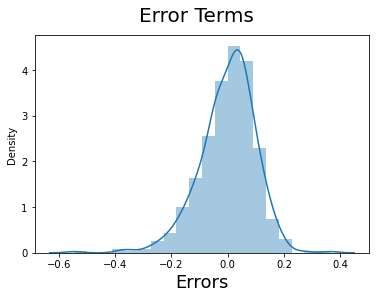

In [100]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Qualitatively, it is centered around 0. Therefore, we can accept this model.

Step 8: Making predictions on test data and evaluating

1. Applying the scaling on the test sets

In [101]:
df_test

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.831783  0.769660  0.655956   0.121812   
535   1        0           1  0.901354  0.842587  0.608826   0.188468   
299   0        0           0  0.511964  0.496145  0.835904   0.361537   
221   0        0           1  0.881625  0.795343  0.436161   0.366681   
152   0        0           0  0.817246  0.741471  0.313625   0.556403   
..   ..      ...         ...       ...       ...       ...        ...   
702   1        0           1  0.519232  0.511907  0.754499   0.312814   
127   0        0           1  0.584649  0.577380  0.649529   0.107707   
640   1        0           1  0.745598  0.682653  0.816195   0.091026   
72    0        0           1  0.331557  0.332005  0.511010   0.236118   
653   1        0           1  0.509887  0.501133  0.574121   0.329497   

          cnt  spring  summer  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
184  0.692706       0       0  ...    0    0    0    0    0    0    0    1   
535  0.712034       0       1  ...    0    0    0    0    0    1    0    0   
299  0.303382       0       0  ...    1    0    0    1    0    0    0    0   
221  0.547400       0       0  ...    0    0    0    0    0    0    0    0   
152  0.569029       0       1  ...    0    0    0    1    0    0    0    0   
..        ...     ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
702  0.757478       0       0  ...    0    0    0    0    0    0    0    1   
127  0.495973       0       1  ...    0    0    0    0    0    0    1    0   
640  0.868615       0       0  ...    1    0    0    0    0    1    0    0   
72   0.232858       1       0  ...    0    0    0    0    0    0    0    1   
653  0.864243       0       0  ...    1    0    0    0    0    0    0    1   

     Cloudy  Snow/Rain  
184       1          0  
535       0          0  
299       1          0  
221       0          0  
152       0          0  
..      ...        ...  
702       0          0  
127       0          0  
640       1          0  
72        0          0  
653       0          0  

[220 rows x 30 columns]

In [102]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.640909    0.558718    0.532847    0.636854   
std      0.500809    0.187620    0.480828    0.233187    0.217401    0.148376   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261354   
25%      0.000000    0.000000    0.000000    0.355429    0.344870    0.528064   
50%      0.000000    0.000000    1.000000    0.558172    0.544652    0.624250   
75%      1.000000    0.000000    1.000000    0.755981    0.713308    0.742204   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.000000   

        windspeed         cnt      spring      summer  ...         Oct  \
count  220.000000  220.000000  220.000000  220.000000  ...  220.000000   
mean     0.341483    0.522154    0.254545    0.263636  ...    0.086364   
std      0.153033    0.219163    0.436599    0.441609  ...    0.281541   
min      0.000000    0.048205    0.000000    0.000000  ...    0.000000   
25%      0.231732    0.378595    0.000000    0.000000  ...    0.000000   
50%      0.328856    0.524678    0.000000    0.000000  ...    0.000000   
75%      0.427237    0.677750    1.000000    1.000000  ...    0.000000   
max      0.815378    0.963300    1.000000    1.000000  ...    1.000000   

              Sep         Mon         Sat         Sun         Thu         Tue  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.086364    0.118182    0.172727    0.154545    0.140909    0.122727   
std      0.281541    0.323559    0.378873    0.362295    0.348721    0.328872   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Wed      Cloudy   Snow/Rain  
count  220.000000  220.000000  220.000000  
mean     0.159091    0.318182    0.027273  
std      0.366595    0.466833    0.163248  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

In [103]:
cols = df_test.describe().columns

In [104]:
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'Cloudy', 'Snow/Rain'],
      dtype='object')

In [105]:
num_vars = ['temp', 'temp', 'hum', 'windspeed', 'cnt']

In [106]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [107]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.640909    0.546074    0.532847    0.508362   
std      0.500809    0.187620    0.480828    0.248645    0.217401    0.200875   
min      0.000000    0.000000    0.000000    0.000000    0.025950    0.000000   
25%      0.000000    0.000000    0.000000    0.329310    0.344870    0.361079   
50%      0.000000    0.000000    1.000000    0.545492    0.544652    0.491299   
75%      1.000000    0.000000    1.000000    0.756414    0.713308    0.650989   
max      1.000000    1.000000    1.000000    1.000000    0.980934    1.000000   

        windspeed         cnt      spring      summer  ...         Oct  \
count  220.000000  220.000000  220.000000  220.000000  ...  220.000000   
mean     0.418803    0.517923    0.254545    0.263636  ...    0.086364   
std      0.187683    0.239498    0.436599    0.441609  ...    0.281541   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.284201    0.361045    0.000000    0.000000  ...    0.000000   
50%      0.403318    0.520681    0.000000    0.000000  ...    0.000000   
75%      0.523975    0.687956    1.000000    1.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Sep         Mon         Sat         Sun         Thu         Tue  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.086364    0.118182    0.172727    0.154545    0.140909    0.122727   
std      0.281541    0.323559    0.378873    0.362295    0.348721    0.328872   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Wed      Cloudy   Snow/Rain  
count  220.000000  220.000000  220.000000  
mean     0.159091    0.318182    0.027273  
std      0.366595    0.466833    0.163248  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

In [108]:
y_test = df_test.pop('cnt')
X_test = df_test

For lr_10

In [109]:
X_test_m10 = sm.add_constant(X_test)

In [110]:
X_test_m10 = X_test_m10.drop(["Mar", "Thu", "Oct", "Jun", "atemp", "workingday", "Sat", "Sun", "hum", "Aug", "May"], axis = 1)

In [111]:
y_pred_m10 = lr_10.predict(X_test_m10)

For lr_13

In [112]:
X_test_m13 = sm.add_constant(X_test)

In [113]:
X_test_m13 = X_test_m13.drop(["Mar", "Thu", "Oct", "Jun", "atemp", "workingday", "Sat", "Sun", "hum", "Aug", "May", "temp", "winter", "Jul"], axis = 1)

In [114]:
y_pred_m13 = lr_13.predict(X_test_m13)

#Step 9: Model Evaluation

1. Plotting y_test and y_pred to understand the spread

ii. For lr_10

Text(0, 0.5, 'y_pred')

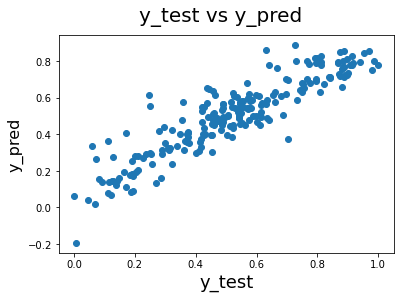

In [115]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m10)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

ii. For lr_13

Text(0, 0.5, 'y_pred')

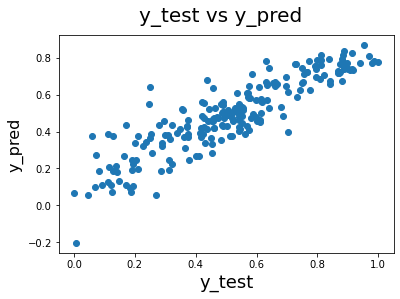

In [116]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m13)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

2. R2 Score and MSE

i. Foe lr_10

In [117]:
from sklearn.metrics import mean_squared_error, r2_score

r_squared = r2_score(y_test, y_pred_m10)

mse = mean_squared_error(y_test, y_pred_m10)

In [118]:
print('Mean Squared Error :' ,mse)
print('R Square Value :',r_squared)

Mean Squared Error : 0.010664552891617374
R Square Value : 0.8132258474643972


Mean Squared Error : 0.010664552891617373

R Square Value : 0.8132258474643972

ii. For lr_13

In [120]:
from sklearn.metrics import mean_squared_error, r2_score

r_squared = r2_score(y_test, y_pred_m13)

mse = mean_squared_error(y_test, y_pred_m13)

In [121]:
print('Mean Squared Error :' ,mse)
print('R Square Value :',r_squared)

Mean Squared Error : 0.012460755921949618
R Square Value : 0.7817679605579628


Mean Squared Error : 0.012460755921949618

R Square Value : 0.7817679605579628

3. Actual vs Predicted

For lr_10

Text(0, 0.5, 'Count')

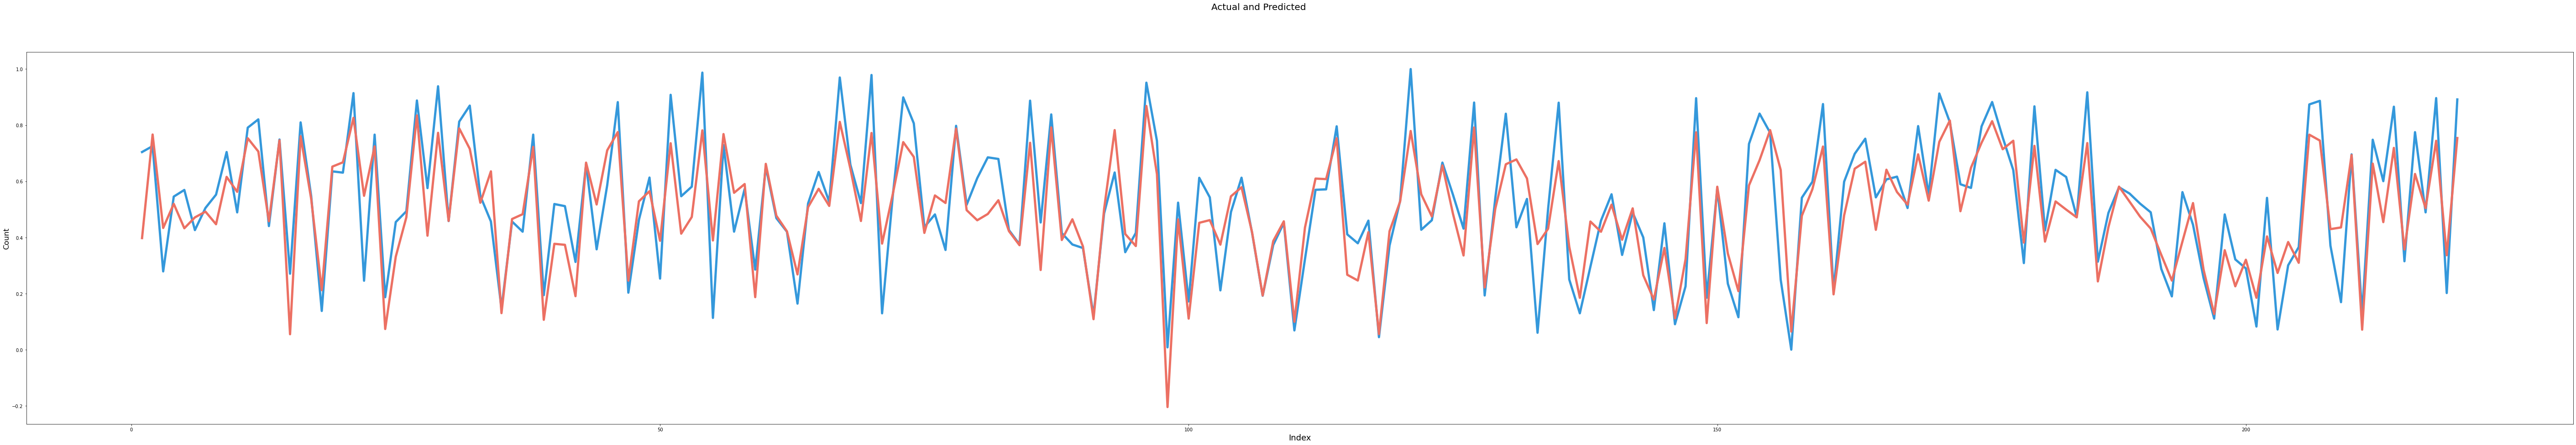

In [122]:
c = [i for i in range(1,221,1)]
fig = plt.figure(figsize = (100, 15))
plt.plot(c,y_test, color="#3498DB", linewidth=5, linestyle="-")
plt.plot(c,y_pred_m13, color="#EC7063",  linewidth=5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Count', fontsize=16)                               # Y-label


For lr_13

Text(0, 0.5, 'Count')

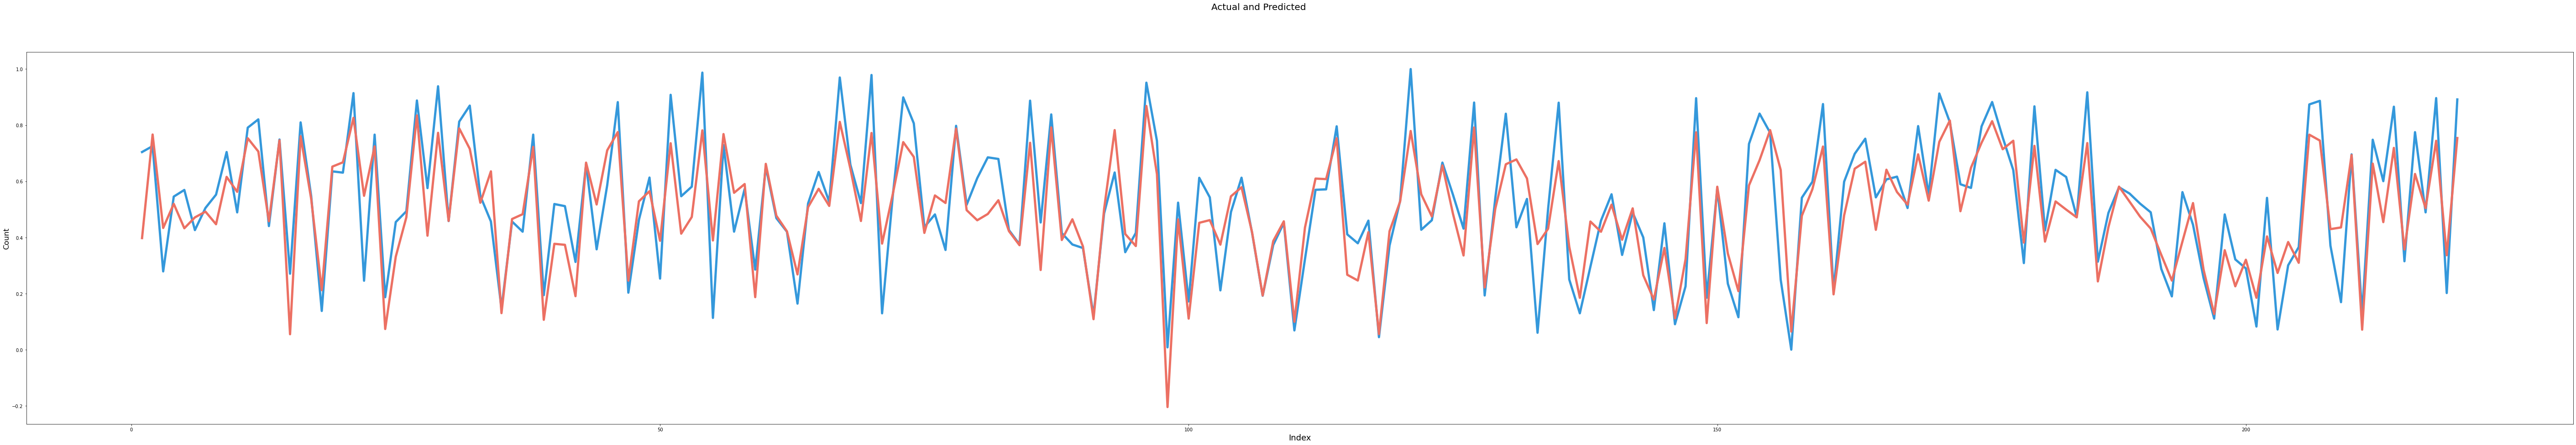

In [123]:
c = [i for i in range(1,221,1)]
fig = plt.figure(figsize = (100, 15))
plt.plot(c,y_test, color="#3498DB", linewidth=5, linestyle="-")
plt.plot(c,y_pred_m13, color="#EC7063",  linewidth=5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Count', fontsize=16)                               # Y-label

From the above graph, we can see that the predicted values very closely coincide with the actual values; This is an indicator that our model is sound.

#Step 10: Suggestions and Inferences:

We select lr_10 and lr_13 models

In [124]:
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     147.8
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          6.17e-185
Time:                        18:41:18   Log-Likelihood:                 512.94
No. Observations:                 510   AIC:                            -987.9
Df Residuals:                     491   BIC:                            -907.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2779      0.033      8.323      0.0

In [125]:
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     134.9
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.09e-163
Time:                        18:41:38   Log-Likelihood:                 454.13
No. Observations:                 510   AIC:                            -876.3
Df Residuals:                     494   BIC:                            -808.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6078      0.014     43.505      0.0

From the above validated model, we can make some generalisations. The insights are as follows:

1.Users tend not to rent and use bikes during Snow or Rain.
2.Users generally prefer riding bikes when the temperature is higher.
3.Bike rentals on Holidays are lesser than working days.
4.Windspeed has a significant effect on bikes being rented.
5.Spring season generally sees lesser bike rentals

Suggestions are as follows:

1. Users tend not to rent and use bikes during Snow or Rain.

We can reduce the price of bike rentals during times of snow or rain by implementing dynamic pricing

We can also implement hand warmers into the bike handlebars

At the bike docking station, we can also have thin displosable rain coats

2. Users generally prefer riding bikes when the temperature is higher.

We can have different offers and coupons sent to riders when we can see a dip in the temperature to increase interest

We can have dynamic pricing to increase rates by 5% for every 5°C change in temp above the mean of 20°C

3. Bike rentals on Holidays are lesser than working days.

Like in the above suggestion, we can send coupons and offers to riders to increase interest on holidays

We can see that bikes are predominantly rented as a means of workplace commuting during workdays.We can have additional marketing to pose bike rides as a lifestyle activity and host events during holidays so that riders can rent bikes and participate in these events

4. Windspeed has a significant (-ve) effect on bikes being rented.

Like in the above suggestion, we can send coupons and offers to riders to increase rentals when the windspeed is high

During months when the windspeed is high on average, like in the case of April, we can have challenges for the number of miles or calories lost during bike rides, and give them a trophy on the app as well as a voucher if they manage to achieve the targets

5. Spring season generally sees lesser bike rentals.

This could be due to the spring breaks and other holidays that are taken during this time

We can have marketing to ensure that people realize that spring is the best season to cycle, apart from that, events and challenges need to be concentrated on in this month.

Spring might also bring plenty of tourists to Washington, they would be classified as casual riders and not registered riders, in Spring there need to be stronger strategies to ensure and entice more number of casual riders during Spring season.

We could include guided bicycle tours of tourist destinations.

Placement of bicycles in docking stations near tourist destinations, parks and restaurants